In [1]:
try: import cPickle as pickle
except: import pickle
from os import environ
# if 'DISPLAY' not in environ:
#     import matplotlib
#     matplotlib.use('Agg')

import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import itertools
from matplotlib import rc
import numpy as np
import pandas as pd
import seaborn
font = {'family': 'serif', 'serif': ['computer modern roman']}
rc('text', usetex=False)
rc('font', weight='bold')
rc('font', size=8)
rc('lines', markersize=2.5)
rc('lines', linewidth=0.5)
rc('xtick', labelsize=6)
rc('ytick', labelsize=6)
rc('axes', labelsize='small')
rc('axes', labelweight='bold')
rc('axes', titlesize='small')
rc('axes', linewidth=1)
plt.rc('font', **font)
seaborn.set_style("darkgrid")
import pdb

In [2]:
graph_info = pd.read_hdf('graphPropertiesPy3.h5', 'df')

In [3]:
graph_info.columns

Index(['Unnamed: 0', 'index', 'network_index', 'network_name', 'title',
       'description', 'networkDomain', 'subDomain', 'citation', 'sourceUrl',
       'hostedBy', 'graphProperties', 'nodeType', 'edgeType', 'nodes_id',
       'edges_id', 'number_nodes', 'number_edges', 'ave_degree', 'labels_Q',
       'labels_Q_MR', 'labels_Q_MP', 'labels_Q_GMP', 'labels_B_NR_SBM',
       'labels_B_NR_DCSBM', 'labels_B_HKK_SBM', 'labels_cICL_HKK_SBM',
       'labels_Infomap', 'labels_MDL_SBM', 'labels_MDL_DCSBM', 'labels_S_NB',
       'labels_S_cBHm', 'labels_S_cBHa', 'labels_AMOS',
       'labels_AMOS_reliablity', 'labels_LRT_WB_DCSBM', 'Q_score',
       'Q_MR_score', 'Q_MP_score', 'Q_GMP_score', 'B_NR_SBM_score',
       'B_NR_DCSBM_score', 'B_HKK_SBM_score', 'cICL_HKK_SBM_score',
       'Infomap_score', 'MDL_SBM_score', 'MDL_DCSBM_score', 'S_NB_score',
       'S_cBHm_score', 'S_cBHa_score', 'AMOS_score', 'LRT_WB_DCSBM_score'],
      dtype='object')

In [4]:
graph_info.at[0, 'number_edges']

560

In [5]:
len(graph_info.at[0, 'labels_Q'])

934

In [6]:
graph_info.at[296, 'networkDomain']

'Transportation'

In [7]:
def plot_benchmark(domains, graph_attrs, methods, graph_names, s_sch='rw', metric='MAP'):
#     df_all = pd.DataFrame()
#     graph_info = pd.read_hdf('graphPropertiesPy3.h5', 'df')
#     for m , g in itertools.product(*[methods, graph_names]):
#         d = graph_info.at[g, "networkDomain"]
#         g = str(g)
#         try:
#             df = pd.read_hdf(path+
#                 "%s_%s_%s_lp_%s_data_hyp.h5" % (d, g, m, s_sch),
#                 "df"
#             )
#             df = df[df["Round Id"] == 0]
# #             print('Graph %s, method %s, MAP %f, p100 %f\n' % (g, m, df.at[10, 'LP MAP'], df.at[10, 'LP P@100']))
#         except:
#             print('%s_%s_%s_lp_%s_data_hyp.h5 not found. Ignoring data set' % (d, g, m, s_sch))
#             continue
#         df["Domain"], df["Method"], df["Graph"] = d, m, g
#         df_all = df_all.append(df).reset_index()
#         df_all = df_all.drop(['index'], axis=1)
#     df_all.to_hdf('real_results.h5', 'df')
    df_all = pd.read_hdf('real_results.h5', 'df')
    df_all['# of Nodes'] = df_all['N']
    df_all['Degree'] = df_all['deg']

    if df_all.empty:
        return
    plot_shape = (3, 3)
    fin1, axarray1 = plt.subplots(3, 3, figsize=(7, 4), sharex='col', sharey='row')
    data_idx = 0
    lines = None
    labels = None
    for attr in graph_attrs.keys():
        for attr_val in graph_attrs[attr]:
            plot_idx = np.unravel_index(data_idx, (3, 3))
            data_idx += 1
#             pdb.set_trace()
            df_grouped = df_all[df_all[attr]==attr_val]
            df_grouped = df_grouped[["dim", "Round Id", "LP %s" % metric, "Method", "Graph"]]
            df_grouped['LP %s' % metric] = df_grouped['LP %s' % metric].astype('float')
            df_grouped = df_grouped.groupby(["dim", "Round Id", "Method", "Graph"]).mean().reset_index()
            try:
                df_grouped['unit']=df_grouped.apply(lambda x:'%s_%s' % (x['Round Id'],x['Graph']),axis=1)
            except:
                pdb.set_trace()
            df_grouped = df_grouped.drop(['Round Id', "Graph","unit"], axis=1)
            if data_idx == 9:
                legend = "brief"
            else:
                legend = False
            try:
                value = "LP %s" % metric
                ax = seaborn.lineplot(x="dim", y=value ,err_style="band", hue="Method",#condition="Method",  units="unit",
                                                 legend=legend,  
                                                data=df_grouped, ax=axarray1[plot_idx[0], plot_idx[1]])
                if data_idx == 9:
                    lines= ax.lines
    #                 print(df_grouped['Method'].unique())
                    _, labels = ax.get_legend_handles_labels()
               

            except Exception as E:
                print(E)
                pdb.set_trace()
            marker =  list(Line2D.markers.keys()) # ["o", "s", "D", "^", "v", "8", "*", "p", "1", "h"]
            ax.set_title(attr+" : "+str(attr_val), pad=-0.1,  fontdict ={'fontsize': 6})
#             ax.set_ylim((0, 0.18))
#             pdb.set_trace()

            for line_i in range(len(ax.lines)):
                try:
                    ax.lines[line_i].set_marker(marker[line_i])
                    ax.lines[line_i].set_markeredgecolor('k')
                    ax.lines[line_i].set_markeredgewidth('0.2')
                    ax.lines[line_i].set_markersize('4.0')
                except Exception as E:
                    print(E)
                    pdb.set_trace()
            if legend != 'False':
                try:
                    ax.get_legend().remove()
#                     ax.legend_.remove()
                except Exception as E:
#                     print(E)
#                     pdb.set_trace()
                    pass
            
#             if not plot_idx[1]:
#                 ax.set_ylabel(attr)
#             if plot_idx[1]:
#                 ax.set_ylabel('')
#             if plot_idx[0] < len(domains) - 1:
#                 ax.set_xlabel('')
            ax.set_ylabel('')    
            ax.set_xlabel('')
            ax.set_xscale('log', basex=2)

    for col_idx in range(axarray1[2].shape[0]):
        box = axarray1[2][col_idx].get_position()
        axarray1[2][col_idx].set_position(
            [box.x0,
             box.y0 + box.height * 0.1,
             box.width,
             box.height * 0.9]
        )
    fin1.legend(lines,  labels,loc='lower center', bbox_to_anchor=(0.47,-0.001),#(0.46, -0.01),
                ncol=len(methods)+1, fancybox=True, shadow=True,prop={'size': 6})
    fin1.text(0.5, 0.06, 'Dimension', ha='center', fontdict ={'fontsize': 8})
    fin1.text(0.07, 0.5, metric, va='center', rotation='vertical', fontdict ={'fontsize': 8})
    plt.savefig(
       'benchmark_real_%s.pdf' % metric, # gem/plots/hyp/
       dpi=300, format='pdf', bbox_inches='tight'
    )
    plt.show()
    plt.clf()

86


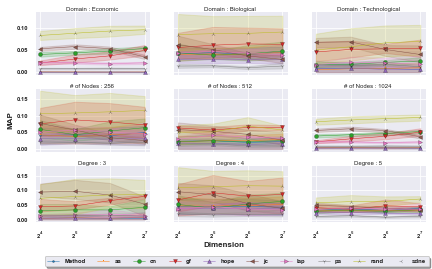

In [ ]:
graph_names = [0, 1, 20, 29, 35, 184, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 216, 217, 218, 219, 220, 221, 222, 224, 225, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 245, 246, 250, 322, 324, 359, 378, 379, 380, 381, 382, 383, 384]
graph_names_new = [177, 178, 183, 208, 209, 210, 211, 212, 213, 214, 215, 223, 226, 227, 228, 229, 249, 251, 252, 253, 254, 289, 296]
graph_names += graph_names_new
print(len(graph_names))
plot_benchmark(
    ["Economic", "Biological", "Technological"],
    {"Domain": ["Economic", "Biological", "Technological"], "# of Nodes": [256, 512, 1024], "Degree": [3, 4, 5]},
    ["gf", "rand", "pa", "lap", "hope", "cn", "aa","sdne", "jc"],
    graph_names,
    s_sch='u_rand',
    metric='MAP'
)
plot_benchmark(
    ["Economic", "Biological", "Technological"],
    {"Domain": ["Economic", "Biological", "Technological"], "# of Nodes": [256, 512, 1024], "Degree": [3, 4, 5]},
    ["gf", "rand", "pa", "lap", "hope", "cn", "aa","sdne", "jc"],
    graph_names,
    s_sch='u_rand',
    metric='P@100'
)